AttributeError: 'Axes' object has no attribute 'qqplot'

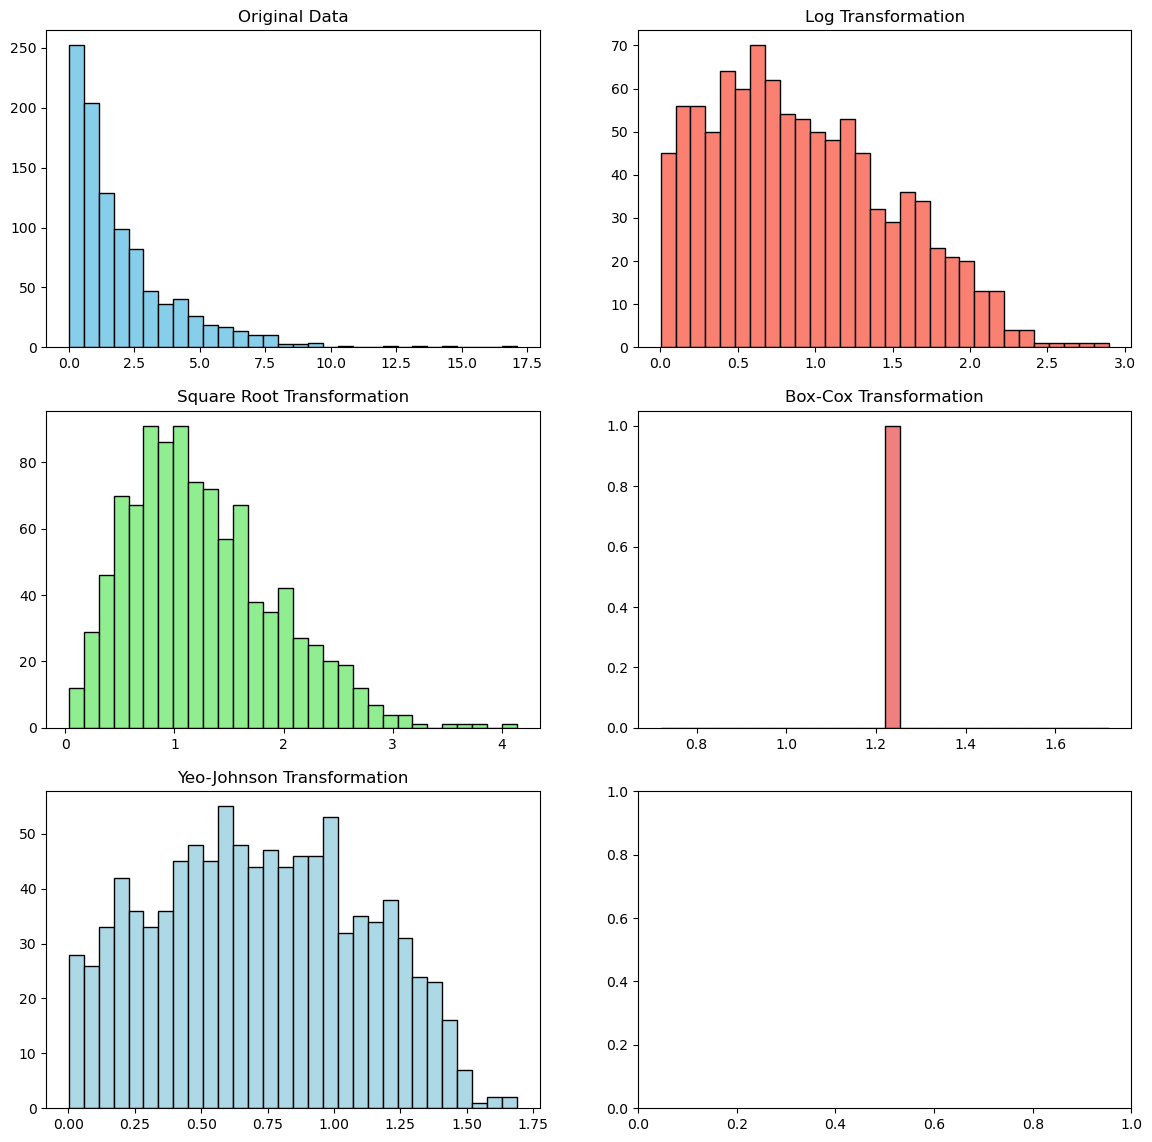

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 비정규 분포 데이터를 생성합니다 (소득 데이터의 예시로 왼쪽으로 치우친 분포)
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)  # 지수 분포로 비정규 데이터 생성


# 데이터 변환 함수들 정의
def box_cox_transformation(data, lmbda):
    return stats.boxcox(data + 1, lmbda=lmbda)[0]


def yeo_johnson_transformation(data, lmbda):
    return stats.yeojohnson(data)[0]


# 변환된 데이터 생성
log_transformed = np.log(data + 1)  # +1을 추가하여 0값 문제 해결
sqrt_transformed = np.sqrt(data)  # 제곱근 변환
box_cox_transformed = box_cox_transformation(
    data, 0.5
)  # lambda = 0.5으로 박스-콕스 변환
yeo_johnson_transformed = yeo_johnson_transformation(data, lmbda=None)  # 예오-존슨 변환

# 그래프를 그립니다
fig, axes = plt.subplots(3, 2, figsize=(14, 14))
axes[0, 0].hist(data, bins=30, color="skyblue", edgecolor="k")
axes[0, 0].set_title("Original Data")

axes[0, 1].hist(log_transformed, bins=30, color="salmon", edgecolor="k")
axes[0, 1].set_title("Log Transformation")

axes[1, 0].hist(sqrt_transformed, bins=30, color="lightgreen", edgecolor="k")
axes[1, 0].set_title("Square Root Transformation")

axes[1, 1].hist(box_cox_transformed, bins=30, color="lightcoral", edgecolor="k")
axes[1, 1].set_title("Box-Cox Transformation")

axes[2, 0].hist(yeo_johnson_transformed, bins=30, color="lightblue", edgecolor="k")
axes[2, 0].set_title("Yeo-Johnson Transformation")

# Q-Q 플롯을 그립니다
axes[2, 1].qqplot(
    yeo_johnson_transformed, dist="norm", line="45", ax=axes[2, 1], color="purple"
)
axes[2, 1].set_title("Q-Q Plot of Yeo-Johnson Transformed Data")

plt.tight_layout()
plt.show()